In [1]:
import torch
from torch.special import log_ndtr

import matplotlib.pyplot as plt

In [2]:
def nb(m, s, l):
    res = (-1.0)**(l - 1.0) / l * (
            torch.exp( m * l + 0.5 * s**2 * (l ** 2) + log_ndtr(-m / s - s * l)) + \
            torch.exp(-m * l + 0.5 * s**2 * (l ** 2) + log_ndtr( m / s - s * l))
        )
    return res

In [3]:
m = torch.ones(1, dtype=torch.double) * 2 
s = torch.ones(1, dtype=torch.double) 


In [4]:
l = torch.arange(1, 1200, dtype=torch.double)
rr = nb(m, s, l)

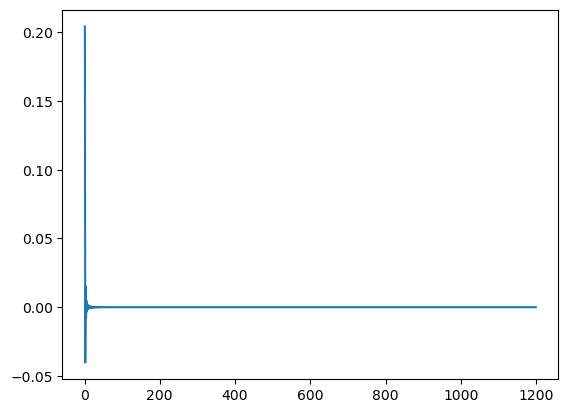

In [5]:
plt.plot(l.numpy(), rr.numpy())

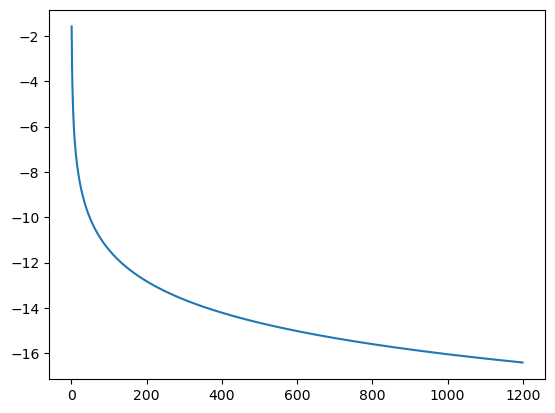

In [6]:
plt.plot(l.numpy(), torch.log(torch.abs(rr)).numpy())

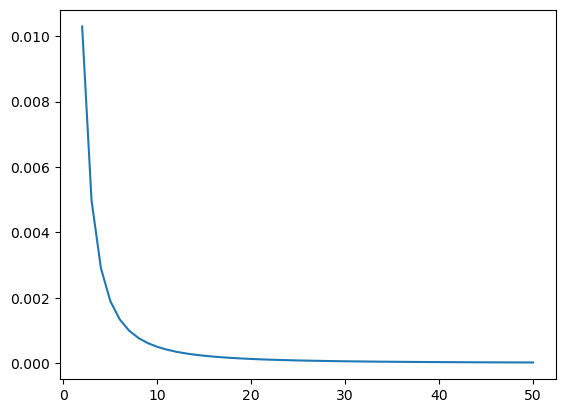

In [9]:
true_val = torch.cumsum(rr, dim=0)[-1]
plt.plot(l[1:50], torch.abs((true_val - torch.cumsum(rr, dim=0)))[1:50].numpy())

In [10]:
err = torch.abs((true_val - torch.cumsum(rr, dim=0)))

In [11]:
rate = err[1:len(err)] / err[0:len(err) - 1]

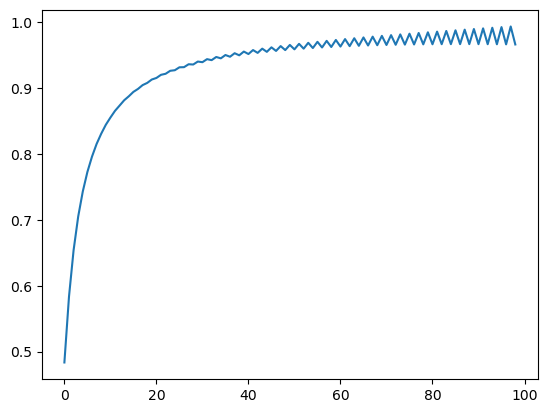

In [12]:
plt.plot(rate[1:100].numpy())

In [19]:
def mc(n, m, s):
    samp = torch.randn(n, dtype=torch.double) * s + m
    return torch.log1p(torch.exp(-samp))

In [20]:
def cumnean(x):
    return torch.cumsum(x, dim=0) / torch.arange(1, len(x) + 1, dtype=torch.double)

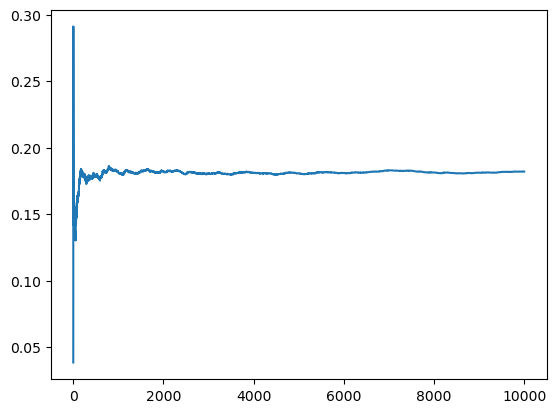

In [21]:
# rate 
mc_res = cumnean(mc(10000, m, s))
plt.plot(mc_res.numpy())

tensor(0.1742, dtype=torch.float64)